# 1. A Checkerboard Matrix

In [2]:
import matplotlib.pyplot as plt
plt.style.use('/home/tim/uvm_courses/phys256/include/notebook.mplstyle')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 
import numpy as np

In [ ]:
checkers = np.zeros((8,8))
checkers[0::2, 1::2]  = 1  # skipping every other row
checkers[1::2, 0::2]  = 1  # skipping every other column
plt.figure(figsize=(8,4))
plt.matshow(checkers, cmap='flag_r',) # _r reverses the colormap!
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Checkers!')

# 2. Cartesian and Polar Coodinates

In [ ]:
import math
import matplotlib.pyplot as plt
plt.style.use('/home/tim/uvm_courses/phys256/include/notebook.mplstyle')
import numpy as np
import numpy.random as rand

In [ ]:
# help(rand.random_sample)
# dir(rand)
def to_polar(rect_array):
    polar_array = np.zeros_like(rect_array) # create empty matrix for polar coords
    for ii in range(len(rect_array)):
        x, y = rect_array[ii, 0], rect_array[ii, 1]
        mag = math.sqrt(x**2 + y**2)
        phi = math.degrees(math.atan2(y, x))
        polar_array[ii,0], polar_array[ii,1] = mag, phi
    return polar_array

cart_coord = 2*(rand.sample([100, 2]) - 0.5) # creating cartesisan coords
polar_coord = to_polar(cart_coord)

fig = plt.figure(figsize=(10,5))
ax1 =fig.add_subplot(121, projection=None)
ax1.scatter(cart_coord[:,0], cart_coord[:,1])
ax1.grid()
ax1.set_xlabel('X-Axis')
ax1.set_ylabel('Y-Axis')
plt.title('Rectangular Coords')

ax2 = fig.add_subplot(122, projection='polar') 
ax2.scatter(polar_coord[:,1], polar_coord[:,0])
plt.title('Polar Coords')





# 3. The Pyroclore Lattice

In [ ]:
a = 10
R_vector = []

# fcc vectors
a1  = (a/2)*np.array([0,1,1])
a2  = (a/2)*np.array([1,0,1])
a3  = (a/2)*np.array([1,1,0])

# Tetrahedral basis
r1 = (a/4)*np.array([0,0,0])
r2 = (a/4)*np.array([1,1,0])
r3 = (a/4)*np.array([1,0,1])
r4 = (a/4)*np.array([0,1,1])

# R = lambda n1, n2, n3, a1, a2, a3: n1*a1 + n2*a2 + n3*a3
def R(n1, n2, n3, a1, a2, a3):
    return n1*a1 + n2*a2 + n3*a3

N = 10 # this will get us well past 500 atoms

for n1 in range(N):
    for n2 in range(N):
        for n3 in range(N):
            if len(R_vector) < N**3:
                R_fcc = R(n1,n2,n3,a1,a2,a3)
                for r in [r1,r2,r3,r4]:
                    R_vector.append(R_fcc + r)
r_vec = np.array(R_vector)

# create the header string
cols = 'X','Y','Z'
headers = '{:>14s}\t{:>16s}\t{:>16s}'.format(*cols)

# save to disk
np.savetxt('pyrochlore.dat', r_vec, fmt='%+16.8E', 
           delimiter='\t', comments='# ', header=headers)
colors = ['mediumblue', 'mediumpurple', 'mediumvioletred', 'aquamarine']
plt.figure()
for r in range(len(r_vec)): #xy
    plt.plot(r_vec[r,0], r_vec[r,1],'o', linestyle=None, color = colors[r%4])
plt.title('XY Projection')
plt.xlabel('X component')
plt.ylabel('Y component')

plt.figure()
for r in range(len(r_vec)): #xz
    plt.plot(r_vec[r,0], r_vec[r,2],'o', linestyle=None, color = colors[r%4])
plt.title('XZ Projection')
plt.xlabel('X component')
plt.ylabel('Z component')

plt.figure()
for r in range(len(r_vec)): #yz
    plt.plot(r_vec[r,1], r_vec[r,2],'o', linestyle=None, color = colors[r%4])
plt.title('YZ Projection')
plt.xlabel('Y component')
plt.ylabel('Z component')

## Graduate problem: A single tetrahedral

In [1]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')

# vertices of a pyramid
ax.scatter3D(r_vec[0:4, 0], r_vec[0:4, 1], r_vec[0:4, 2])

verts = [ [r_vec[0],r_vec[1],r_vec[2]], [r_vec[1],r_vec[2],r_vec[3]],
 [r_vec[0],r_vec[2],r_vec[3]], [r_vec[0],r_vec[1],r_vec[3]]]

# plot sides
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='mediumpurple', linewidths=1, edgecolors='k', alpha=.5))


NameError: name 'plt' is not defined

In [ ]:
def get_postions(a, n1, n2, n3):
    a1  = (a/2)*np.array([0,1,1])
    a2  = (a/2)*np.array([1,0,1])
    a3  = (a/2)*np.array([1,1,0])
    # Tetrahedral basis
    r1 = (a/4)*np.array([0,0,0])
    r2 = (a/4)*np.array([1,1,0])
    r3 = (a/4)*np.array([1,0,1])
    r4 = (a/4)*np.array([0,1,1])
    
    vec = n1*a1 + n2*a2 + n3*a3
    
    return np.array([vec+r1, vec+r2, vec+r3, vec+r4])

    

# Grad problem: two tetrahedrals

NameError: name 'get_postions' is not defined

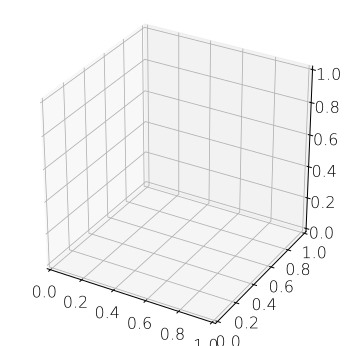

In [3]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')
a = 10
r_vec = get_postions(a, 0,0,0)
# vertices of a pyramid
ax.scatter3D(r_vec[:, 0], r_vec[:, 1], r_vec[:, 2])
verts = [ [r_vec[0],r_vec[1],r_vec[2]], [r_vec[1],r_vec[2],r_vec[3]],
 [r_vec[0],r_vec[2],r_vec[3]], [r_vec[0],r_vec[1],r_vec[3]]]
ax.add_collection3d(Poly3DCollection(verts, facecolors='mediumpurple', linewidths=1, edgecolors='k', alpha=.5))
r_vec = get_postions(a, 1,0,0)
# vertices of a pyramid
ax.scatter3D(r_vec[:, 0], r_vec[:, 1], r_vec[:, 2])
verts = [ [r_vec[0],r_vec[1],r_vec[2]], [r_vec[1],r_vec[2],r_vec[3]],
 [r_vec[0],r_vec[2],r_vec[3]], [r_vec[0],r_vec[1],r_vec[3]]]
ax.add_collection3d(Poly3DCollection(verts, facecolors='mediumpurple', linewidths=1, edgecolors='k', alpha=.5))
ax.set_zlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlim([0, 10])

# ax.view_init(0, 270)

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
a = 10
N=5
for i in range(N):
    for j in range(N):
        for k in range(N):
            r_vec = get_postions(a, i,j,k)  # create positions
            if (np.all(r_vec <= a)): # check that magnitudes are not greater than 'a' 
                ax.scatter3D(r_vec[:, 0], r_vec[:, 1], r_vec[:, 2])
                verts = [ [r_vec[0],r_vec[1],r_vec[2]], [r_vec[1],r_vec[2],r_vec[3]],
                 [r_vec[0],r_vec[2],r_vec[3]], [r_vec[0],r_vec[1],r_vec[3]]] # these are all planes that make up the tetrahedral
                ax.add_collection3d(Poly3DCollection(verts, facecolors='mediumpurple', linewidths=1, edgecolors='k', alpha=.5))

ax.set_zlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlim([0, 10])
ax.view_init(45, 45)
ax.set_title('Unit Cell of the Pyroclore Lattice')
ax.set_xlabel('X Length (Å)')
ax.set_ylabel('Y Length (Å)')
ax.set_zlabel('Z Length (Å)')